# 1. 2-D Transforms

[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]
[[0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1.]]
[0. 0. 1. 1. 0.] [0. 1. 1. 0. 0.]


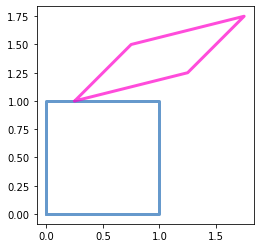

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import string

# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)

# matrix with row vectors of points
P = np.array([a, b, c, d]).T
print(P)

# H = np.identity(3)
# H[0,0] = 2
# H[1,1] = 2
# H[2, 0] = 0.3
# H[2, 1] = 0.5

t = np.pi/4
#s = scale
s = 2.

#H = [[s*np.cos(t), s*np.sin(t), 2.], [-s*np.sin(t), s*np.cos(t), 1.], [0., 0., 1.]]
H = [[1.,0.5,0.25],[0.25,0.5,1.],[0.,0.,1.]]
#print(H)

Pt = np.matmul(H, P)#matrix production of two arrays
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
print(P)
x = P[0, :]
y = P[1, :]
print(x,y)
#Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
#print(Pt)

fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


ax.plot(xt, yt, color='#ff00cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


# 2. Warping Using a Given Homography

In [11]:
import cv2 as cv
import numpy as np

im1 = cv.imread('./images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
#im4 = cv.imread('./images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('./images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
   
with open('./images/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]       
H = np.array(H)
print(H)


im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]
[[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


# 3. Computing the Homogrpahy Using Mouse-Clicked Points and Warping

In [14]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('./images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('./images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

# take the copy of input images 
im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27: #The ASCII of the esc key is 27
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

H, mask = cv.findHomography(p1,p2)
print (H)

im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000)) # Combined the two pictures
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1 # set the image size to the im1 size

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)

cv.destroyAllWindows()

[[387. 238.]
 [280. 251.]
 [325. 247.]
 [387. 129.]
 [379. 291.]]


# 4. Computing the Homogrpahy Using Mouse-Clicked Points without OpenCV

In [ ]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('./images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('./images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

#Creating A
A = np.empty((2*N, 9)) 

for i in range(N):
    A[2*i,:] = np.array([0,0,0,p2[i,0],p2[i,1],1,-1*p1[i,1]*p2[i,0],-1*p1[i,1]*p2[i,1],-1*p1[i,1]])
    A[2*i+1,:] = np.array([p2[i,0],p2[i,1],1,0,0,0,-1*p1[i,0]*p2[i,0],-1*p1[i,0]*p2[i,1],-1*p1[i,0]])


M = np.matmul(A.T,A)# M = A' * A
u,w,v = np.linalg.svd(M) # Taking the eigenvalues and eigenvectors 
h = v[np.argmin(w),:] # Eigenvector corresponding to the lowest eigenvalue
H = h.reshape(3,3) # Reshaping the matrix 
H = np.linalg.inv(H) # taking the inverse
H = H/H[-1,-1] # Normalizing the matrix to make h33 = 1


im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)

cv.destroyAllWindows()

# 5. Stiching More Than Two Images Using Mouse-Clicked Points

In [1]:
import numpy as np
import cv2 as cv

N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))
p3 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

img1 = cv.imread('./images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
img2 = cv.imread('./images/graf/img2.ppm', cv.IMREAD_ANYCOLOR)
img3 = cv.imread('./images/graf/img3.ppm', cv.IMREAD_ANYCOLOR)

img1copy = img1.copy()
img2copy = img2.copy()
img3copy = img3.copy()   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, img1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", img1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, img2copy]
n = 0
cv.namedWindow("Image 2", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 2',draw_circle, param)

while(1):
    cv.imshow("Image 2", img2copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p3, img3copy]
n = 0
cv.namedWindow("Image 3", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 3',draw_circle, param)

while(1):
    cv.imshow("Image 3", img3copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)
print(p3)

H1to2, mask1 = cv.findHomography(p1,p2)
print (H1to2)
H1to3, mask2 = cv.findHomography(p1,p3)
print (H1to3)

img2_warped = cv.warpPerspective(img2, np.linalg.inv(H1to2), (1000,1000))
img2_warped[0:img1.shape[0], 0:img1.shape[1]] = img1
cv.namedWindow("Image 2 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 2 Warped", img2_warped)
cv.waitKey(0)

img3_warped = cv.warpPerspective(img3,np.linalg.inv(H1to3),(1000,1000))
cv.namedWindow("Image 3 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 3 Warped", img3_warped)
cv.waitKey(0)

img2_warped[0:img3_warped.shape[0],0:200] = img3_warped[:,0:200]

cv.namedWindow("Final Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Final Image", img2_warped)
cv.waitKey(0)

cv.destroyAllWindows()

[[335. 194.]
 [405. 208.]
 [527. 223.]
 [381. 466.]
 [517. 346.]]
[[296. 256.]
 [355. 253.]
 [449. 239.]
 [412. 484.]
 [475. 345.]]
[[378. 208.]
 [416. 237.]
 [476. 276.]
 [335. 464.]
 [441. 380.]]
[[ 1.07871622e+00  3.95501709e-01 -9.17231087e+01]
 [-1.60818173e-01  1.09971769e+00  1.40439559e+02]
 [ 4.42148633e-04  1.15902383e-04  1.00000000e+00]]
[[ 8.74683364e-01 -2.88297828e-01  2.06465566e+02]
 [ 3.85487681e-01  1.10342824e+00 -9.96150203e+01]
 [ 4.79789096e-04  5.76941710e-05  1.00000000e+00]]


In [13]:
def findSubstring(s, k):
    # Write your code here
    vowel = ['a','e','i','o','u']
    best = 0
    final ="Not found!"
    for i in range(len(s)-k+1):
        letter =s[i:i+k]
        print(letter)
        list1 = list(letter)
        #print(list1)
        t =0        
        for i in range(k):
            if list1[i] in vowel:
                t+=1
        print (t)
        if best <  t :
            best = t 
            final = letter
    return final

s = "azerdii"
k =5

print(findSubstring(s,k))

azerd
2
zerdi
2
erdii
2
azerd
